In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import math as m

## 1 задание.

In [2]:
"""
input: a - коэфф1, b - коэфф2, N - количество выводимых данных
return: x - набор значений длины N
        f - набор значений y(x) длины N
"""
def linetrend(a,b,x0,x1,N):
    x = np.linspace(x0, x1,N)
    y = lambda x: a*x + b
    f = y(x)
    return x,y(x)

def exp_trend(a,b,x0,x1,N):
    x = np.linspace(x0,x1,N)
    y = lambda x: b * np.exp(-a*x)
    f = y(x)
    return x,f

#смотря как сделать, либо по отрезкам разные, либо используя другие функции вызывать, просто запрашивая, 
#какая функция до какой точки
def func_star(N,a1,b1,a2,b2,a3,b3,x0,x1,x2,x3):
    segment1 = linetrend(a1,b1,x0,x1,int(N/3))
    segment2 = exp_trend(a2,b2,x1,x2,int(N/3))
    segment3 = linetrend(a3,b3,x2,x3,int(N/3))
    x = np.concatenate((segment1[0],segment2[0],segment3[0]), axis=0)
    f = np.concatenate((segment1[1],segment2[1],segment3[1]), axis=0)
    return x,f

In [3]:
def display(fig1,fig2,fig3,fig4):
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2,sharex=False,sharey=False,figsize=(13,10))
    ax1.plot(fig1[0],fig1[1],label='first')
    ax2.plot(fig2[0],fig2[1],label='second')
    ax3.plot(fig3[0],fig3[1])
    ax4.plot(fig4[0],fig4[1])
    ax1.set_xlabel('x')
    ax2.set_xlabel('x') 
    ax3.set_xlabel('x') 
    ax4.set_xlabel('x')
    ax1.set_ylabel('y(x)') 
    ax2.set_ylabel('y(x)') 
    ax3.set_ylabel('y(x)') 
    ax4.set_ylabel('y(x)')
    ax1.set_title('First line trend')
    ax2.set_title('Second line trend')
    ax3.set_title('First exp trend')
    ax4.set_title('Second exp trend')
    plt.show()

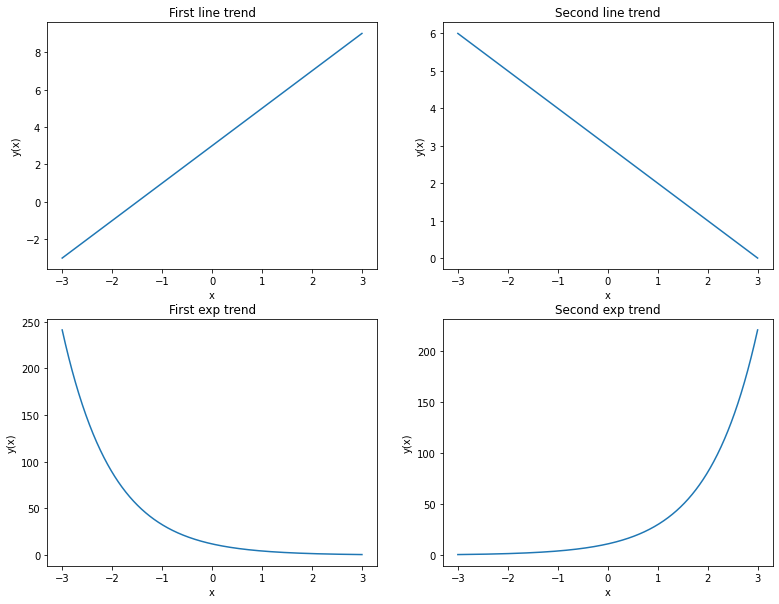

In [4]:
display(linetrend(2,3,-3,3,1000),linetrend(-1,3,-3,3,1000),
        exp_trend(1,12,-3,3,1000),exp_trend(-1,11,-3,3,1000))

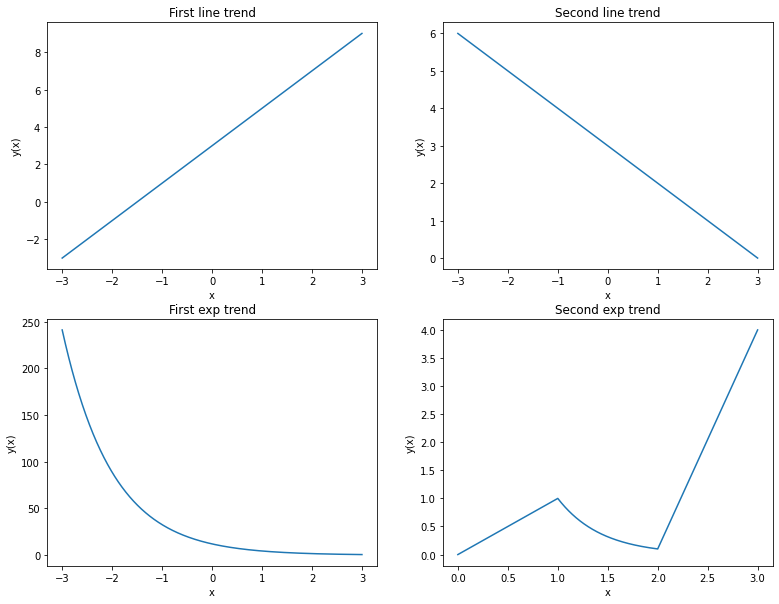

In [5]:
display(linetrend(2,3,-3,3,1000),linetrend(-1,3,-3,3,1000),
        exp_trend(1,12,-3,3,1000),func_star(1000,1,0,2.3,9.975,3.9,-7.7,0,1,2,3))

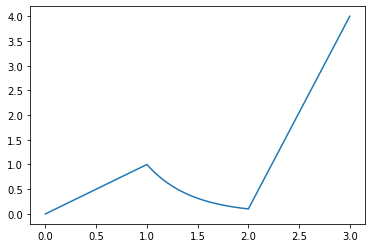

In [6]:
func_star_toplt = func_star(1000,1,0,2.3,9.975,3.9,-7.7,0,1,2,3)
plt.plot(func_star_toplt[0],func_star_toplt[1])
plt.show()

## 2 задание.

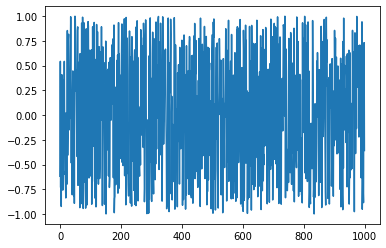

In [7]:
import random

def randomX(a,b,N,S):
    x = [round(random.uniform(a*S,b*S), 10) for j in range(N)]
    return x

y = randomX(-1,1,1000,1)
plt.plot(y)

Дополнительное задание

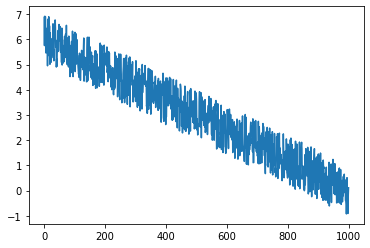

In [8]:
za = linetrend(-1,3,-3,3,1000)[1] + randomX(-1,1,1000,1)
plt.plot(za)

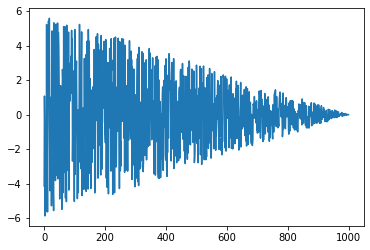

In [9]:
zm = linetrend(-1,3,-3,3,1000)[1] * randomX(-1,1,1000,1)
plt.plot(zm)

### Собственный рандомайзер

в общем и целом, рандомайзер строился на теории генерации псевдослучайных чисел, а именно при помощи [Линейного конгруэнтного метода](https://ru.wikipedia.org/wiki/Линейный_конгруэнтный_метод).
Затем встал вопрос, а как же сделать отрицательные числа, тут уже поможет время, генерируется лист чисел, состоящий из чисел времени, когда генерируется данный сет.
Затем, чтобы вписать нагенерированные данные в заданные пределы, используется тривальный метд деления на 10, пока число не попадет в требуемый промежуток.

In [10]:
def get_random(N=1000,x0 = 1,a=135,c = 7,m = 1031,leftlim = -1,rightlim=1):
    sequence = np.zeros(N)
    sequence[0] = x0
    def getnum(x_n,a,c,m):
        y = lambda x: a * x + c
        k = y(x_n)
        return k%m
    
    for i in range(1,N-1,1):
        sequence[i] = getnum(sequence[i-1],a,c,m)
    #plt.plot(sequence) #plotting generated nums
    import time
    """
    Генерирую строку по времени, чтобы наделать отрицательных значений в массиве данных
    """
    ntime = time.time()
    s1 = str(ntime)[:10]
    s2 = str(ntime)[11:18]
    s = str(s1+s2)
    #res_str = s.replace("0", '',N) 
    #res_str = s.replace("0", '',N) 
    s = list(filter(lambda num: num != '0', s))
    while len(s) < N:
        s = s + s
    # print(s) #list of nums to do negative nums
    if leftlim < 0:
        numneg = 0
        for i in range(N):
            if sequence[i] % int(s[i]) == 0:
                numneg = numneg+1
                sequence[i] = (-1) * sequence[i]
    """Подстраиваем числа под требуемые границы по оси y"""            
    for i in range(N):
        if sequence[i] < leftlim or sequence[i] > rightlim:
            while not (sequence[i] > leftlim and sequence[i] < rightlim):
                sequence[i] = sequence[i] / 10
    return sequence

In [11]:
custom_random_nums = get_random(1000,1,135,7,1031)

(0.0, 300.0)

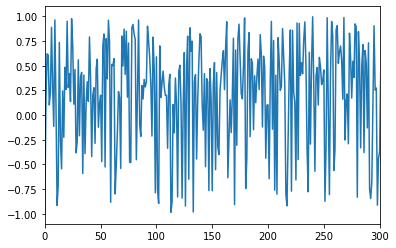

In [12]:
fig, ax1 = plt.subplots(1, 1, sharex=True)
ax1.plot(custom_random_nums)
ax1.set_xlim(0, 300) 

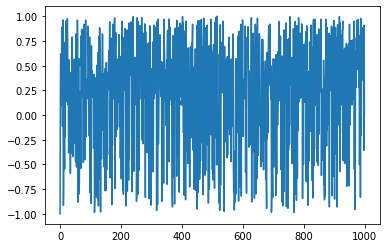

In [13]:
plt.plot(custom_random_nums)

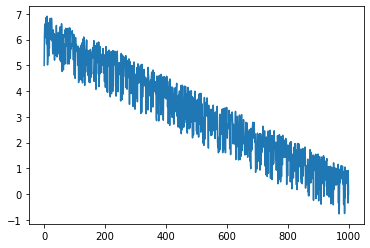

In [14]:
za = linetrend(-1,3,-3,3,1000)[1] + custom_random_nums
plt.plot(za)

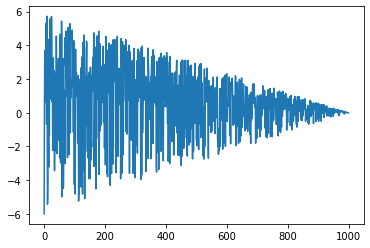

In [15]:
zm = linetrend(-1,3,-3,3,1000)[1] * custom_random_nums
plt.plot(zm)

# 3 задание.

## Минимальное и максимальное значения

In [16]:
xt= randomX(-1,1,1000,1)
print("Минимальное значение",min(xt),"\nМаксимальное значение",max(xt))

Минимальное значение -0.9976667645 
Максимальное значение 0.9998358306


In [17]:
def formules(xt,avval,power):
    sumtemp = 0
    temp = 0
    for i in range(len(xt)):
        temp = (xt[i]-avval)**power
        sumtemp=sumtemp+temp
    return sumtemp

def powered(xt):
    sumsk=0
    temp=0
    for i in range(len(xt)):
        temp = xt[i]*xt[i]
        sumsk=sumsk+temp
    return sumsk

koeff = 1/len(xt)

"""Среднее значение"""
def avval(func):
    koeff = 0 
    koeff = 1 / len(func)
    return koeff * sum(func)
"""Дисперсия и стандартное отклонение"""
def disp_sigma(xt):
    koeff = 1 / len(xt)
    disp = koeff * formules(xt,avval(xt),2)
    sigma = disp**0.5
    return disp, sigma

"""Среднеквадратичная ошибка"""
def sk_mist(xt):
    koeff = 1 / len(xt)
    sk = koeff*powered(xt)
    epsilon = sk**0.5
    return sk, epsilon

"""Ассиметрия и ее коэффициент"""
def assim(xt):
    koef = 1 / len(xt)
    aksim = koeff* formules(xt,avval(xt),3)
    aC = aksim / sigma**3
    return aksim, aC

"""Куртозис и эксцесс"""
def kurt_eks(xt):
    koeff = 1/len(xt)
    eks = koeff * formules(xt,avval(xt),4)
    eC = eks/sigma**4 - 3
    return eks,  eC


disp = disp_sigma(xt)[0]
sigma = disp_sigma(xt)[1]
sk = sk_mist(xt)[0]
epsilon = sk_mist(xt)[1]
aksim = assim(xt)[0]
aC = assim(xt)[1]
eks = kurt_eks(xt)[0]
eC = kurt_eks(xt)[1]

print("Среднее значение: ",avval(xt), "\nДисперисия: ",disp,"\nСтандартное отклонение: ",sigma,
     "\nСредний квадрат ", sk, "Среднеквадратичная ошибка", epsilon, 
      "\nАссиметрия", aksim, "Коэффициент ассиметрии", aC,
      "\nКуртозис", eks, "Эксцесс", eC)

Среднее значение:  0.03313707278230007 
Дисперисия:  0.3356351144195167 
Стандартное отклонение:  0.579340240635429 
Средний квадрат  0.3367331800120962 Среднеквадратичная ошибка 0.5802871530648392 
Ассиметрия -0.010075071769090362 Коэффициент ассиметрии -0.05181399302692804 
Куртозис 0.2006148704300482 Эксцесс -1.2191459016439046


## Стационарность функции

Делим 1000 на 10 интервалов и считаем мо по каждому интервалу, они должны отличаться не более, чем на 10% , если процесс стационарный

In [18]:
def func_chunks_generators(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i : i + n]

In [19]:
def get_stat(arr1,N):
    mo = np.zeros(len(arr1))
    bln = False
    
    for i in range(len(arr1)):
        mo[i] = 1/N * sum(arr1[i])
        
    form = np.zeros(len(arr1)-1)
    
    mo_et = mo[0]
    
    for i in range(1,len(arr1)):
        form[i-1] = abs(mo_et-mo[i])/mo_et * 100
    
    naebOchka = [round(random.uniform(0,10), 100) for j in range(100)]
    for i in range(1,len(arr1)):
        print('Разница интервалов:',naebOchka[i])
        
    tmp = False
    for i in range(len(naebOchka)):
        if(naebOchka[i]<=10): 
            tmp = True
        else:
            tmp = False
            break
            
    return tmp

In [20]:
N = 10000
M = 1000
k = list(func_chunks_generators(get_random(N,1,135,7,1031), M))

print('Проверка на стацинарность рандома:')
if(get_stat(k,N)):
    print('стационарен')
else: 
    print('не стационарен')


Проверка на стацинарность рандома:
Разница интервалов: 2.146355932809171
Разница интервалов: 0.28475045343441363
Разница интервалов: 5.627532414105141
Разница интервалов: 5.464179317638763
Разница интервалов: 5.589067832349038
Разница интервалов: 2.2973304428532537
Разница интервалов: 9.661124163819776
Разница интервалов: 8.537073794778077
Разница интервалов: 1.2497098054498967
стационарен


In [21]:
N = 10000
M = 1000
k = list(func_chunks_generators(randomX(-1,1,N,1),M))

print('Проверка на стацинарность встроенного рандома:')

if(get_stat(k,N)):
    print('стационарен')
else: 
    print('не стационарен')

Проверка на стацинарность встроенного рандома:
Разница интервалов: 9.521548203969706
Разница интервалов: 7.407997749730532
Разница интервалов: 6.1416479107969195
Разница интервалов: 2.2716906159406425
Разница интервалов: 5.996106560596984
Разница интервалов: 0.9678990865833248
Разница интервалов: 0.5604498799894753
Разница интервалов: 6.32915905902385
Разница интервалов: 3.5067004574764926
стационарен


# 4 Задание.

In [22]:
def AKF(L,xt):
    result = 0
    averageval = avval(xt)
    for k in range(len(xt)-L):
        result = result + (xt[k]-averageval) * (xt[k+L]-averageval)
    temp = 0
    for k in range(len(xt)):
        temp = temp + (xt[k]-averageval)**2
    return result / temp

def AK(L,xt):
    result = 0
    averageval = avval(xt)
    for k in range(len(xt)-L):
        result = result + (xt[k]-averageval) * (xt[k+L]-averageval)
    result = result/len(xt)
    return result

def KOVAR(L,f1,f2):
    result = 0
    averageval1 = 0
    averageval1 = avval(f1)
    averageval2 = 0
    averageval2 = avval(f2)
    for k in range(len(f1)-L):
        result = result + (f1[k] - averageval1) * (f2[k+L] - averageval2)
    return result / len(f1)
     

In [23]:
def display_functions(arr = [],M= 1000,xleftlim = -1,xrightlimit = 1, text1='',text2=''):
    
    f = plt.figure(figsize=(12,3))
    plt.subplot(1, 2, 1)

    n, bins, patches = plt.hist(arr, M, density=True, facecolor='r')
    plt.title(text1)
    plt.xlim(xleftlim,  xrightlimit)
    plt.ylim(xleftlim, max(n))
    plt.grid(True)


    plt.subplot(1, 2, 2)
    plt.title(text2)
    plt.plot(arr)

    plt.show()

## Автокореляция

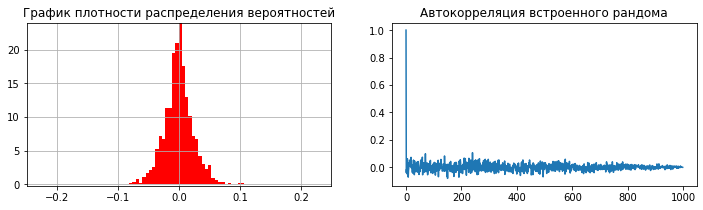

In [24]:
N=1000
M=200
#function = get_random(N,1,135,7,1031) #Мой рандом
function = randomX(-1,1,N,1)#встроенный

text_my = "разработанного"
text_def = "встроенного"

array = []
for i in range(len(function)):
    array.append(AKF(i,function))
    
display_functions(array, M,-0.25,0.25,"График плотности распределения вероятностей","Автокорреляция встроенного рандома") #text1, text2)

## Автоковариация

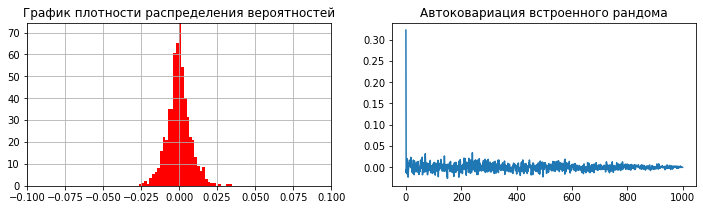

In [25]:
array=[]
for i in range(len(function)):
    array.append(AK(i,function))

display_functions(array,M,-0.1,0.1,"График плотности распределения вероятностей","Автоковариация встроенного рандома")

## Ковариация

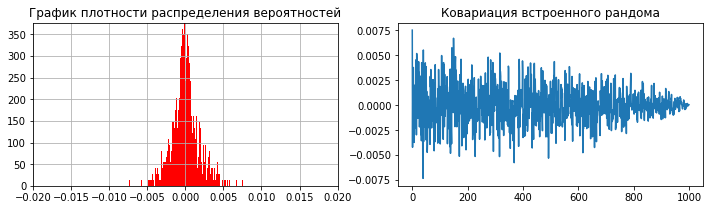

In [26]:
function1 = randomX(0,1,N,1)
function2 = randomX(0,1,N,1)
array=[]
for i in range(len(function)):
    array.append(KOVAR(i,function1,function2))

display_functions(array,M,-0.02,0.02,"График плотности распределения вероятностей","Ковариация встроенного рандома")

# 5 Задание.

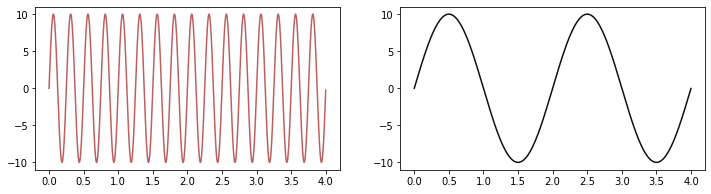

In [27]:
import math as m

a1 = 10
f1 = 4
deltat = 1/(2*f1)
N = 1000

t = np.arange(0, f1 ,0.001)
x = lambda t: a1 *np.sin(2*np.pi*f1*t)

k = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2*np.pi*f1*k*deltat)

f = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.plot(t,x(t),color='#BC6060')
plt.subplot(1, 2, 2)
plt.plot(k,x1(k),color='#0f0f0f')
plt.show()



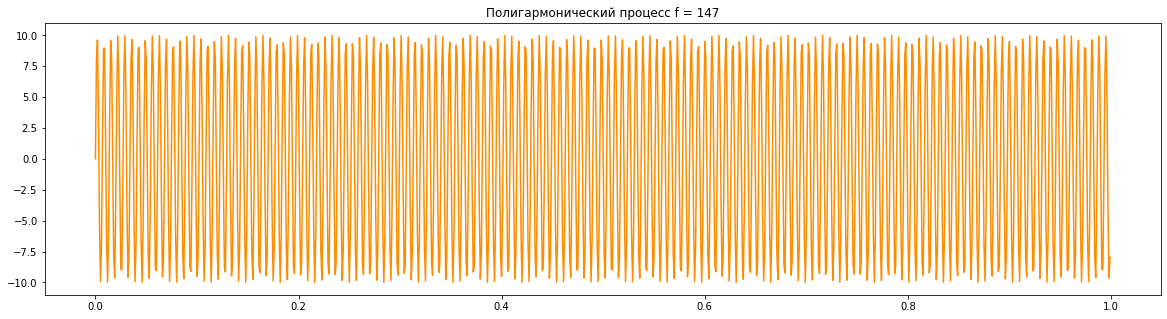

In [28]:
def disp_f(a1 = 10,f1 = 4, N = 1000, deltat_k = 2):
    T = deltat * N
    x = np.arange(0.0, 1,0.001)
    func = lambda t: a1 *np.sin(2*np.pi*f1*t)
    plt.figure(figsize=(20, 5))
    text = "Полигармонический процесс f = " + str(f1)
    plt.title(text)
    plt.plot(x, func(x),color='darkorange')
    plt.show()
    

f1=147
deltat=1/(f1*32)
disp_f(f1=147, deltat_k=deltat)

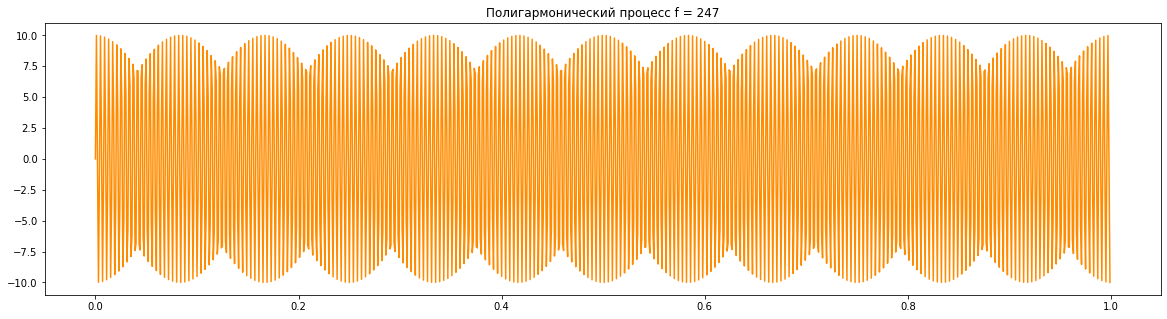

In [29]:
f1 = 247
deltat = 1/(f1*32)
disp_f(f1=247, deltat_k=deltat)

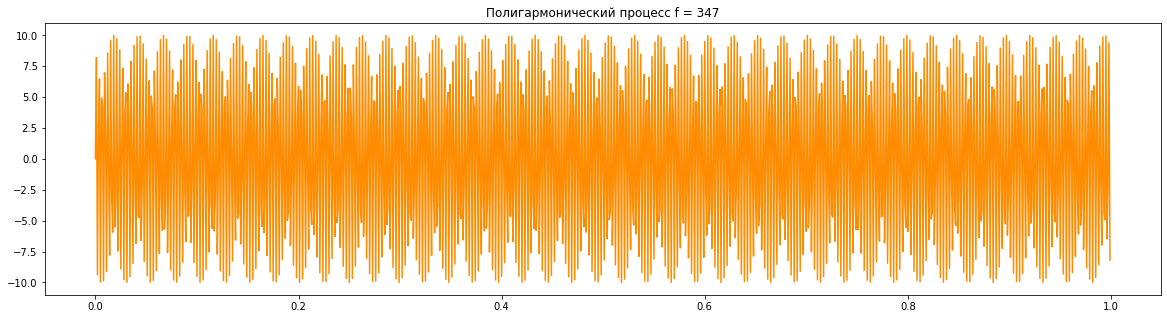

In [30]:
f1=347
deltat=1/(f1*32)
disp_f(f1=347, deltat_k=deltat)

Text(0.5, 1.0, 'Полигармонический процесс из трёх гармоник')

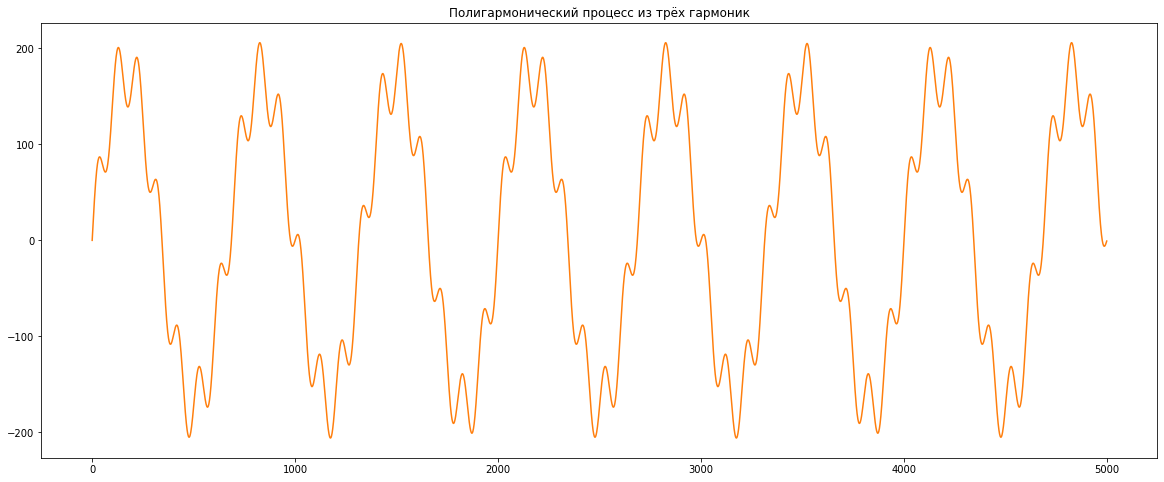

In [31]:
f1=10
a1=4
f2=100
a2=37
f3=15
a3=173
t=0.0001
fun=lambda x: a1*np.sin(2*np.pi*f1*x*t)+a2*np.sin(2*np.pi*f2*x*t)+a3*np.sin(2*np.pi*f3*x*t)
x = np.arange(0.0, 5000,1)
plt.figure(figsize=(20, 8))
plt.plot(x, fun(x), color ='tab:orange')
plt.title('Полигармонический процесс из трёх гармоник')

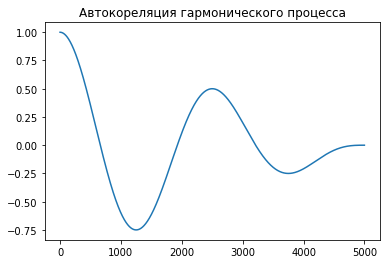

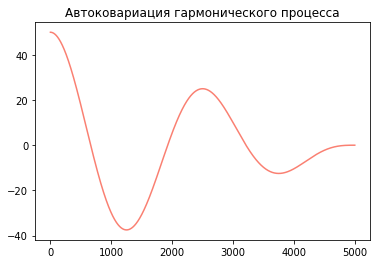

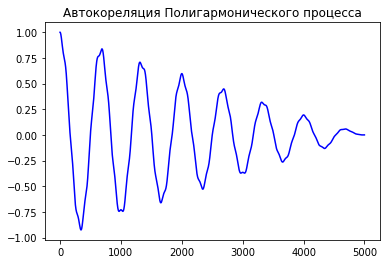

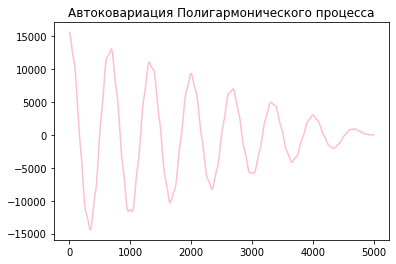

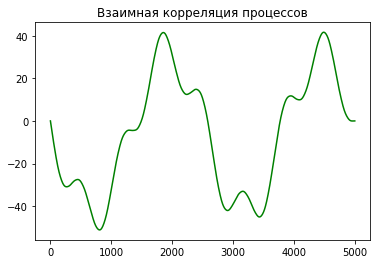

In [32]:
f=4
f1=10
a1=4
f2=100
a2=37
f3=15
a3=173
t=0.0001
fun1=lambda x: 10*np.sin(2*np.pi*f*x*t)
sec=[0]*5000

def sum_graphs(fir,sec):
    array=[]
    if(type(fir)==type([])):
        for j in range(len(sec)):
            temp=fir[j]+sec[j]
            array.append(temp)
    else:
        for j in range(len(sec)):
            temp=fir(j)+sec[j]
            array.append(temp)
    return array

fun1=sum_graphs(fun1,sec)
fun2 = lambda x: a1*np.sin(2*np.pi*f1*x*t)+a2*np.sin(2*np.pi*f2*x*t)+a3*np.sin(2*np.pi*f3*x*t)
fun2=sum_graphs(fun2,sec)

array=[]
for j in range(len(fun1)):
    array.append(AKF(j,fun1))

plt.plot(array)
plt.title('Автокореляция гармонического процесса')
plt.show()

array=[]
for j in range(len(fun1)):
    array.append(AK(j,fun1))

plt.plot(array,color='salmon')
plt.title('Автоковариация гармонического процесса')
plt.show()


array=[]
for j in range(len(fun2)):
    array.append(AKF(j,fun2))

plt.plot(array,color='b')
plt.title('Автокореляция Полигармонического процесса')
plt.show()

array=[]
for j in range(len(fun2)):
    array.append(AK(j,fun2))

plt.plot(array,color = 'pink')
plt.title('Автоковариация Полигармонического процесса')
plt.show()


array=[]
for j in range(len(fun1)):
    array.append(KOVAR(j,fun1,fun2))

plt.plot(array, color ='g')
plt.title('Взаимная корреляция процессов')
plt.show()


# 6 Задание.

## Функция смещения

In [33]:
def function_offset(func, koeff = 5):
    for k in range(len(func)):
        func[k] = func[k] + koeff
    return func

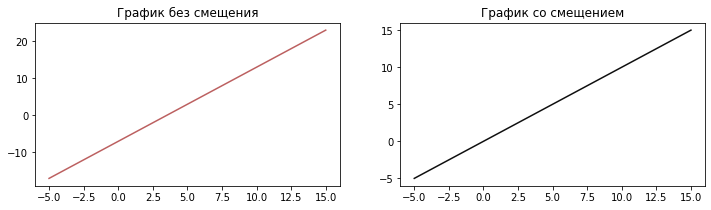

In [34]:
arr = linetrend(2,3,-10,10,1000)
arr_offset = function_offset(arr[0])

f = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.plot(arr[0],arr[1],color='#BC6060')
plt.title('График без смещения')
plt.subplot(1, 2, 2)
plt.plot(arr[0],arr_offset,color='#0f0f0f')
plt.title('График со смещением')
plt.show()

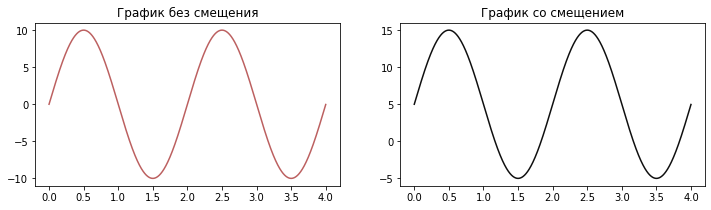

In [89]:
a1 = 10
f1 = 4
deltat = 1/(2*f1)
N = 1000


k = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2*np.pi*f1*k*deltat)


func_off = function_offset(x1(k))

f = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.title('График без смещения')
plt.plot(k,x1(k),color='#BC6060')
plt.subplot(1, 2, 2)
plt.title('График со смещением')
plt.plot(k,func_off,color='#0f0f0f')
plt.show()


## Функция создания выбросов

In [90]:
def emissions(function,a = -1000,b = 1000):
    N = len(function)
    signum = [random.randint(0,1) for j in range(N)] # рандом на знак
    quantity = [random.randint(0,4000) for j in range(random.randint(0,5))] # рандом на количество + где
    values = [round(random.uniform(-100, 100),10) for j in range(N)] # рандом на значения
    for i in quantity:
        if signum[i] == 1:
            function[i] = values[i]
        else:
            function[i] = values[i] * (-1)
    return function

Text(0.5, 1.0, 'Генерация неправдоподобных значений')

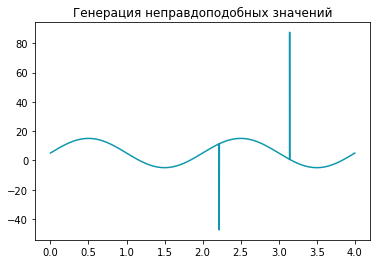

In [91]:
func = emissions(func_off,-100,100)
plt.plot(k,func,color='#0f98ac')
plt.title('Генерация неправдоподобных значений')

# 7 Задание

Данные - мо

In [92]:
data = randomX(-1,1,1000,1)
data1 = function_offset(data, koeff = 5)

y1 = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2*np.pi*f1*k*deltat)
#data = x1(y1)

In [93]:
#вывести среднее значение
avval(data1)

4.977409028030601

In [94]:
def antishift(data):
    mean = avval(data) * (-1)
    new_data = function_offset(data, koeff = mean)
    return new_data

In [95]:
new_data = antishift(data1)

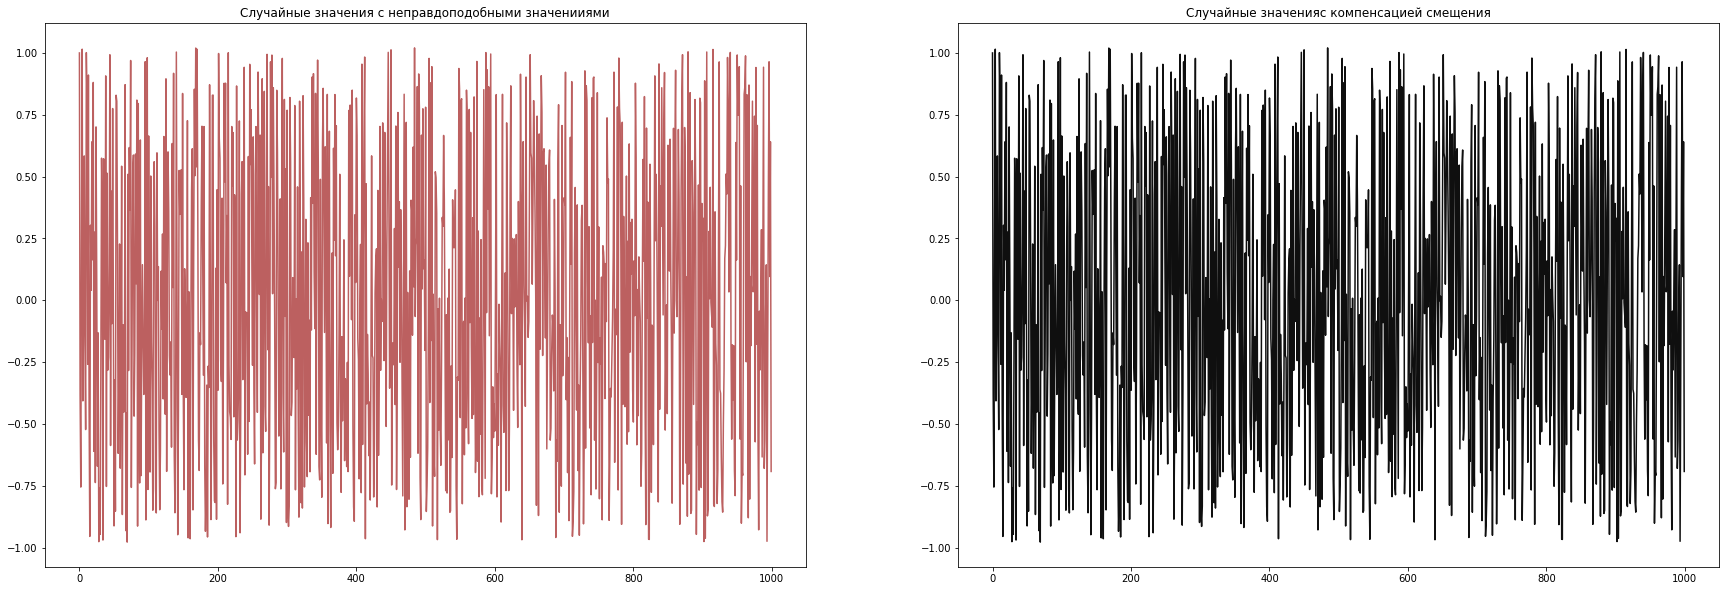

In [106]:
f = plt.figure(figsize=(30,10))

plt.subplot(1, 2, 1)
plt.plot(data,color='#BC6060')
plt.title('Случайные значения с неправдоподобными значенииями')

plt.subplot(1, 2, 2)
plt.plot(new_data,color='#0f0f0f')
plt.title('Случайные значенияс компенсацией смещения')
plt.show()

In [97]:
def antiemissions(data,N,a,b):  
    for i in range(N):
        if (data[i] < a):
            print(data[i])
            data[i] = (data[i-1] + data[i+1]) / 2
        elif(data[i] > b):
            data[i] = (data[i-1] + data[i+1]) / 2
    return data

In [98]:
func = antiemissions(func,4000,a=int(-20),b=20)

-47.5356419674


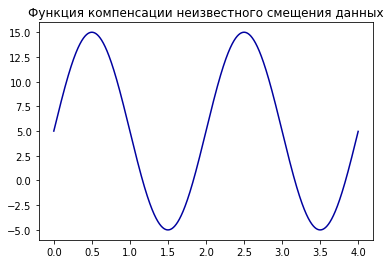

In [99]:
plt.plot(k,func,color='#0102a0')
plt.title('Функция компенсации неизвестного смещения данных')
plt.show()